In [45]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
def get_historic_price(symbol, exchange='bitfinex', after='2022-09-01'):
    url = "https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc".format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        "periods": "3600", 
        "after": str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=['CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

In [47]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2023-06-14 21:26:20.856047')

In [48]:
btc = get_historic_price("btc", 'bitstamp', after=last_week)

In [49]:
eth = get_historic_price("eth", 'bitstamp', after=last_week)

In [50]:
xrp = get_historic_price("xrp", 'bitstamp', after=last_week)

In [51]:
btc.head()


,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2023-06-14 22:00:00,24927,25188,24835,25122,150.137929,3.762928e+06
2023-06-14 23:00:00,25117,25117,24966,25035,53.496276,1.338006e+06
2023-06-15 00:00:00,25030,25143,24975,25127,87.763180,2.202019e+06
2023-06-15 01:00:00,25125,25200,25079,25199,41.876525,1.053776e+06
2023-06-15 02:00:00,25199,25200,25027,25061,18.773126,4.717308e+05


<Axes: xlabel='CloseTime'>

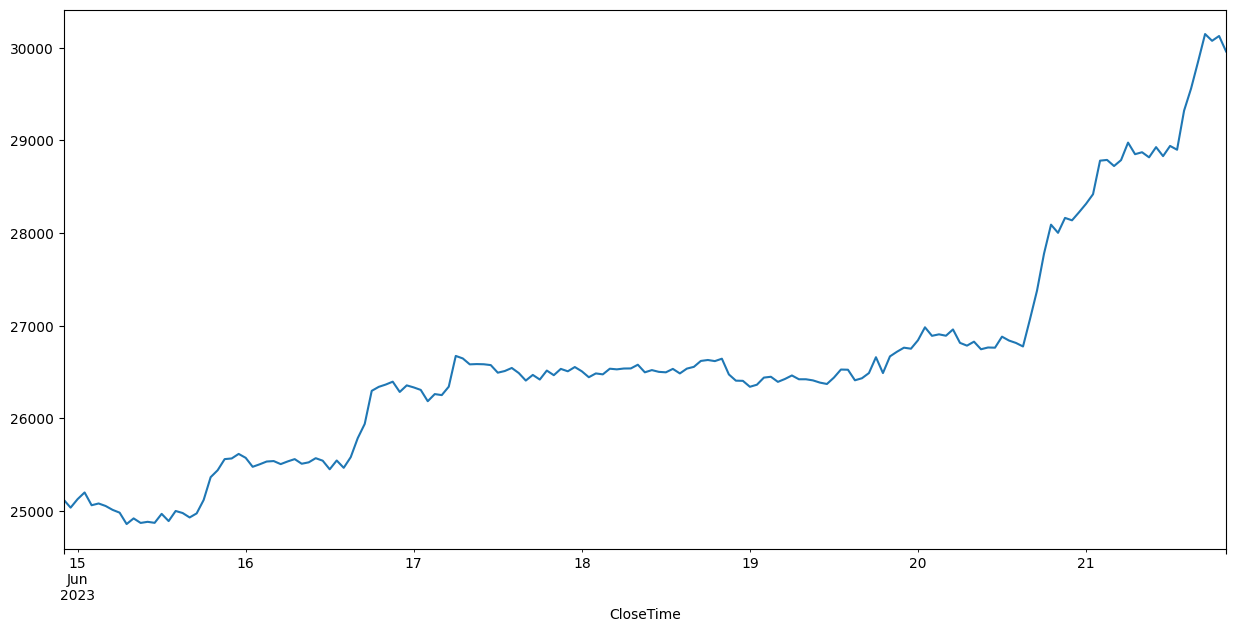

In [52]:
btc['ClosePrice'].plot(figsize=(15, 7))

In [53]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2023-06-14 22:00:00,1631.0,1655.9,1631.0,1654.3,971.691586,1.602284e+06
2023-06-14 23:00:00,1654.0,1655.7,1646.4,1650.2,316.570476,5.226457e+05
2023-06-15 00:00:00,1649.8,1653.1,1645.8,1651.0,320.716702,5.294207e+05
2023-06-15 01:00:00,1650.1,1655.6,1648.9,1654.9,251.703467,4.163627e+05
2023-06-15 02:00:00,1655.3,1655.5,1643.1,1648.7,162.324979,2.673288e+05


<Axes: xlabel='CloseTime'>

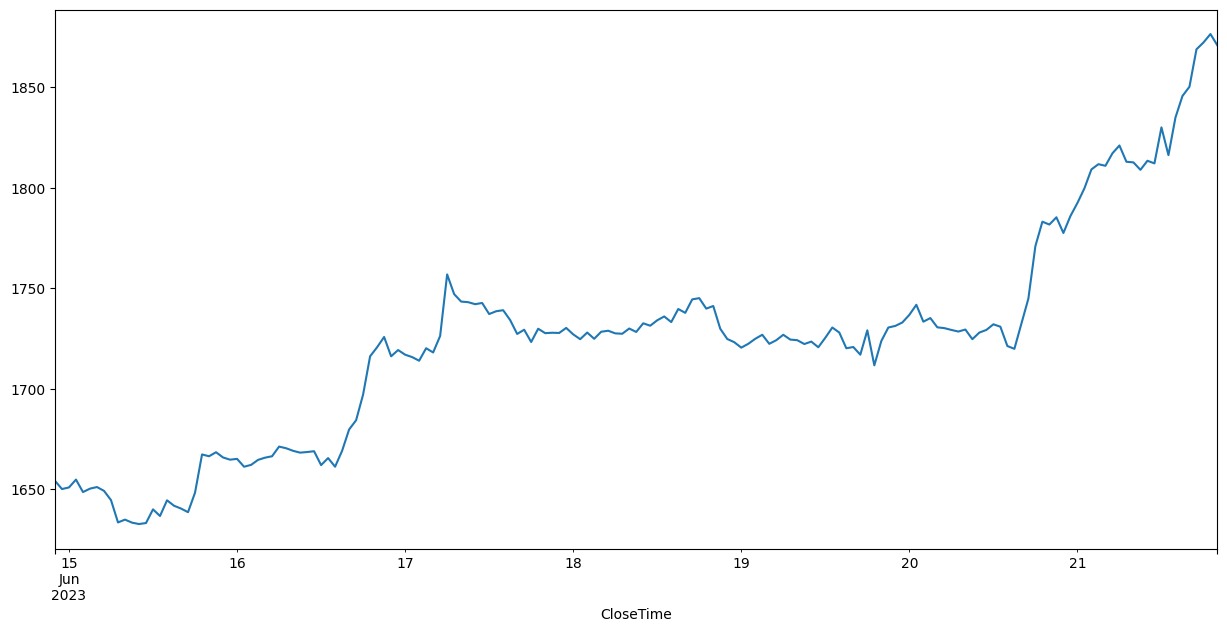

In [54]:
eth['ClosePrice'].plot(figsize=(15, 7))

In [55]:
xrp.head()


,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2023-06-14 22:00:00,0.46648,0.48189,0.46504,0.48120,1.548132e+06,736969.602822
2023-06-14 23:00:00,0.48114,0.48114,0.47554,0.47836,5.059308e+05,242163.522494
2023-06-15 00:00:00,0.47889,0.48125,0.47605,0.48013,6.352358e+05,303658.909948
2023-06-15 01:00:00,0.47992,0.48404,0.47767,0.48181,9.554855e+05,460068.537922
2023-06-15 02:00:00,0.48138,0.48138,0.47654,0.47801,5.571365e+05,267481.257909


<Axes: xlabel='CloseTime'>

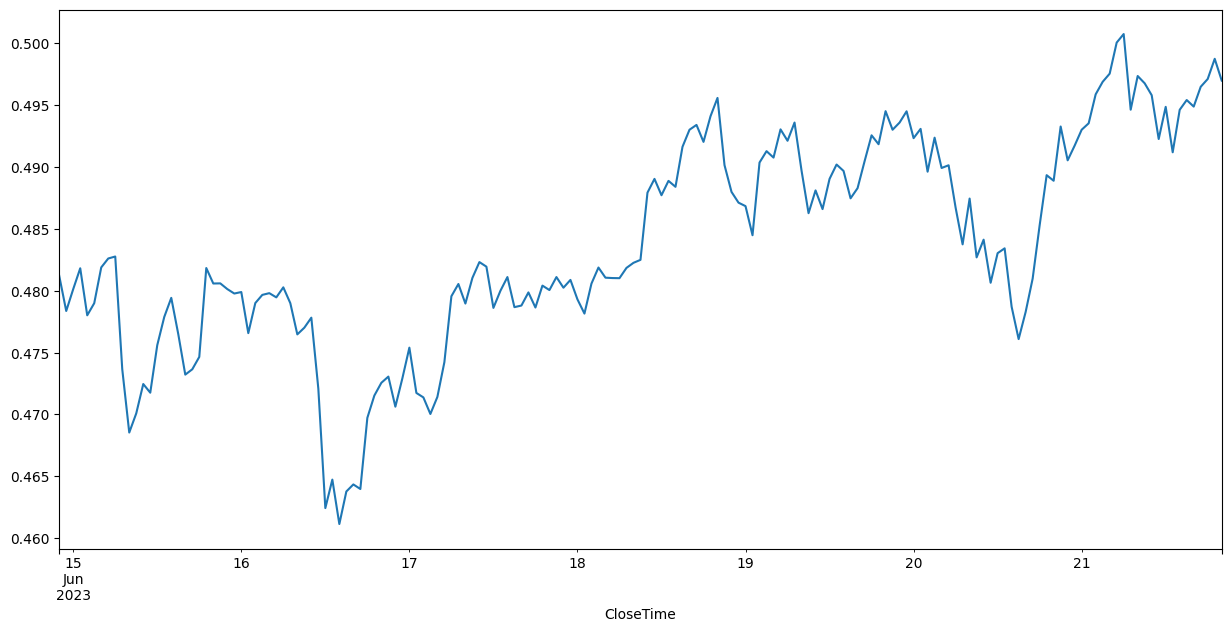

In [56]:
xrp['ClosePrice'].plot(figsize=(15, 7))

In [58]:
btc['ClosePrice'].corr(eth['ClosePrice'])

0.9806456317551895

In [59]:
btc['ClosePrice'].corr(xrp['ClosePrice'])

0.700399983378596